In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlite3 import connect
%matplotlib inline

In [16]:
con = connect('../data/nips-papers/database.sqlite')
papers_df = pd.read_sql_query('select * from papers;', con, index_col='id')
authors_df = pd.read_sql_query('select * from authors;', con, index_col='id')

## Basic papers statistics

In [37]:
papers_df.head()

,year,title,event_type,pdf_name,abstract,paper_text
id,,,,,,
1,1987,Self-Organization of Associative Database and ...,,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
2,1987,The Capacity of the Kanerva Associative Memory...,,2-the-capacity-of-the-kanerva-associative-memo...,Abstract Missing,184\n\nTHE CAPACITY OF THE KANERVA ASSOCIATIVE...
3,1987,Supervised Learning of Probability Distributio...,,3-supervised-learning-of-probability-distribut...,Abstract Missing,52\n\nSupervised Learning of Probability Distr...
4,1987,Constrained Differential Optimization,,4-constrained-differential-optimization.pdf,Abstract Missing,612\n\nConstrained Differential Optimization\n...
5,1987,Towards an Organizing Principle for a Layered ...,,5-towards-an-organizing-principle-for-a-layere...,Abstract Missing,485\n\nTOWARDS AN ORGANIZING PRINCIPLE FOR\nA ...


In [38]:
papers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6560 entries, 1 to 6603
Data columns (total 6 columns):
year          6560 non-null int64
title         6560 non-null object
event_type    6560 non-null object
pdf_name      6560 non-null object
abstract      6560 non-null object
paper_text    6560 non-null object
dtypes: int64(1), object(5)
memory usage: 358.8+ KB


**event_type statistics**

In [66]:
print(papers_df.event_type.unique())
papers_df.event_type.value_counts()

['' 'Oral' 'Spotlight' 'Poster']


             4819
Poster       1505
Spotlight     181
Oral           55
Name: event_type, dtype: int64

**abstract statistics**

In [47]:
papers_df.abstract.describe()

count                 6560
unique                3244
top       Abstract Missing
freq                  3317
Name: abstract, dtype: object

In [68]:
sum(papers_df.abstract == 'Abstract Missing')

3317

**title statistics**

In [58]:
papers_df.title.describe()

count                                                  6560
unique                                                 6560
top       Unsupervised learning models of primary cortic...
freq                                                      1
Name: title, dtype: object

**year statistics**

In [75]:
print(papers_df.year.min())
print(papers_df.year.max())

1987
2016


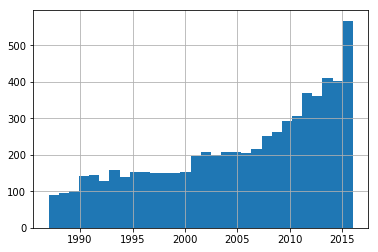

In [82]:
papers_df.year.hist(bins=30)

## Basic authors statistics

In [84]:
authors_df.head()

,name
id,
1,Hisashi Suzuki
2,Suguru Arimoto
3,Philip A. Chou
4,John C. Platt
5,Alan H. Barr


In [104]:
authors_df.name.describe()

count             8653
unique            8595
top       Stella X. Yu
freq                 3
Name: name, dtype: object

**Non-uniqe author entries**

In [107]:
q = '''select name, count(name) name_count from authors
group by name having count(name) > 1 order by count(name) desc;'''
pd.read_sql_query(q, con)

,name,name_count
0,Daniel D. Lee,3
1,Stella X. Yu,3
2,Alex J. Smola,2
3,Alexander T. Ihler,2
4,Andrew Y. Ng,2
5,Angela J. Yu,2
6,Arian Maleki,2
7,Brendan Frey,2
8,C. A. Mead,2
9,Carl Edward Rasmussen,2
